In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing Data Set 
df = pd.read_csv("sales_data2.csv_2024-08-31T2221.csv")
df.head()

,order_id,product_id,price,quantity,date
0,1001,201,25.99,2,1/1/2022
1,1001,203,18.50,1,1/1/2022
2,1001,207,22.95,3,1/1/2022
3,1002,202,15.99,2,1/2/2022
4,1002,204,9.99,1,1/2/2022


In [8]:
#Total Revenue

df['total_revenue'] = df['price'] * df['quantity']
total_revenue = df['total_revenue'].sum()
print("The total revenue is \n", total_revenue)

The total revenue is 
 480.11


In [11]:
# Average order

unique_order = df['order_id'].nunique()
avg_or_val = total_revenue / unique_order

print("The Average value of an order is :",avg_or_val.round(2))


The Average value of an order is : 68.59


In [13]:
# Total Quantity Sold Per Product (Product Sales)

sales = df.groupby('product_id')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=True)


In [15]:
# Top 5 Best Selling Products (Based on quantity sold)

top_five = sales.sort_values(by='quantity', ascending=False).head(5)
print(top_five)

   product_id  quantity
0         201         8
7         208         5
6         207         4
1         202         3
2         203         2


In [24]:
# Visualizations

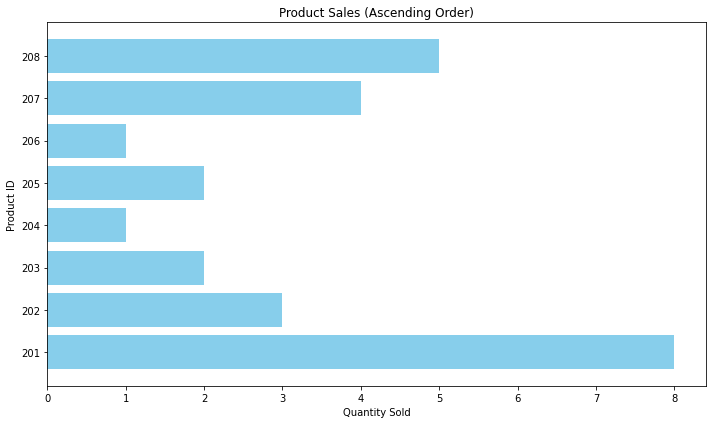

In [25]:
plt.figure(figsize=(10,6))
plt.barh(sales['product_id'], sales['quantity'], color='skyblue')
plt.xlabel('Quantity Sold')
plt.ylabel('Product ID')
plt.title('Product Sales (Ascending Order)')
plt.tight_layout()
plt.show()

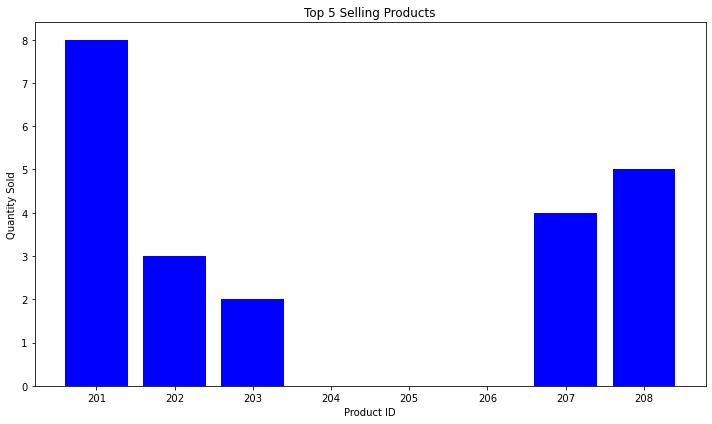

In [28]:
# Top Five
plt.figure(figsize=(10,6))
plt.bar(top_five['product_id'], top_five['quantity'], color='blue')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title('Top 5 Selling Products')
plt.tight_layout()
plt.show()

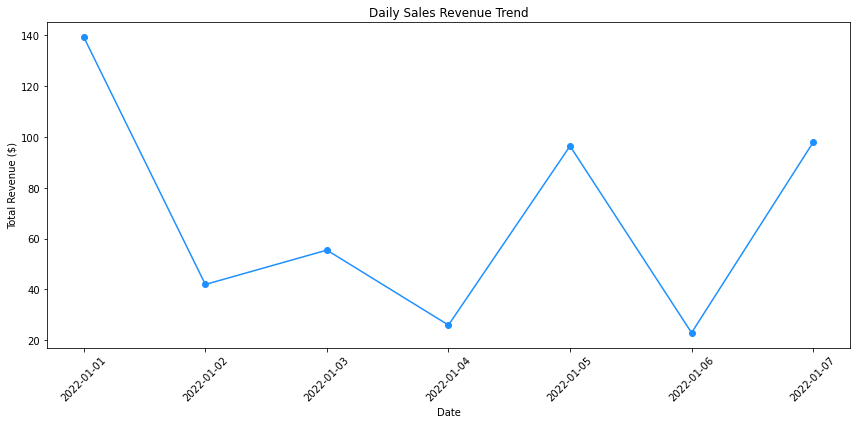

In [30]:
# Trend Analysis on Sales and Revenue
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
daily_sales = df.groupby(df['date'].dt.date)['total_revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_sales['date'], daily_sales['total_revenue'], marker='o', color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.title('Daily Sales Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

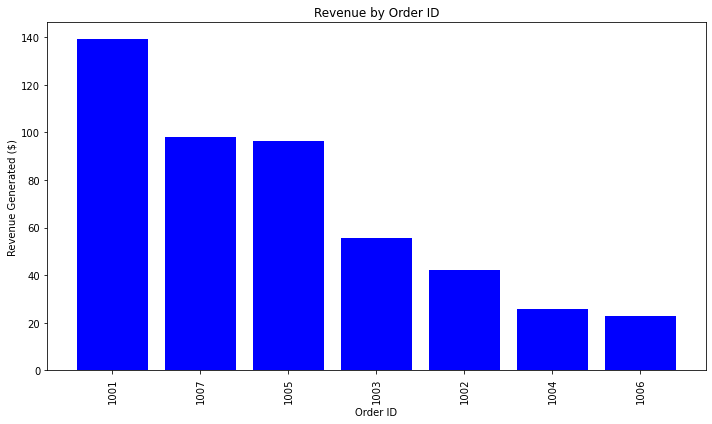

In [33]:
# Customer Segmentation
customer_revenue = df.groupby('order_id')['total_revenue'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='total_revenue', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(customer_revenue['order_id'].astype(str), customer_revenue['total_revenue'], color='blue')
plt.xlabel('Order ID')
plt.ylabel('Revenue Generated ($)')
plt.title('Revenue by Order ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()